# Supervised learning Model

## Preparing Data

In [1]:
import pandas as pd

imune_df = pd.read_csv("../raw_data/CIBERSORTx_Job7_Results.txt",sep='\t')
imune_df.head()

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [2]:
#! pip install pyreadstat
import pyreadstat

clinical_df, meta = pyreadstat.read_sav("../raw_data/FIRE3_Heike_set_new.sav")
imune_df.head()

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [3]:
imune_df.shape

(451, 26)

In [4]:
clinical_df.head()

,study,pat_nr,CET1_REST0,arm,sex,age,ecog,skin_rash,MOL_SG,RNA_Probe,...,orr1,dpr1,ets_cat,SYNCH_META,PRIMARY_RES,RADIOVORHER,LK,AP,CTX_ADJ,filter_$
0,FIRE 3,1.0,0.0,2.0,2.0,60.0,0.0,0.0,3.0,1.0,...,1.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,1.0
1,FIRE 3,2.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,FIRE 3,3.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,0.0
3,FIRE 3,4.0,0.0,2.0,1.0,58.0,0.0,0.0,3.0,1.0,...,1.0,NaN,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0
4,FIRE 3,5.0,0.0,2.0,2.0,54.0,0.0,0.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [5]:
imune_df = imune_df.rename({'Mixture': 'pat_nr'}, axis='columns')
imune_df.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [6]:
clinical_df.shape

(735, 37)

In [7]:
clinical_df["pat_nr"]=clinical_df["pat_nr"].astype('int64')
clinical_df.pat_nr.dtype

dtype('int64')

In [8]:
clinical_df.head(30)
clinical2=clinical_df[["pat_nr","skin_rash"]]
clinical2

,pat_nr,skin_rash
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
730,896,0.0
731,897,0.0
732,898,0.0
733,899,0.0


In [9]:
cdf=imune_df.merge(clinical2, how='inner', on='pat_nr')
cdf.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE,skin_rash
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925,0.0
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143,0.0
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813,0.0
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058,1.0
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998,1.0


In [10]:
cdf.shape

(442, 27)

## Initiating Supervised Model

In [11]:
X=cdf.drop(columns=["pat_nr","P-value","Correlation","RMSE","skin_rash"])
y=cdf["skin_rash"]

<AxesSubplot:>

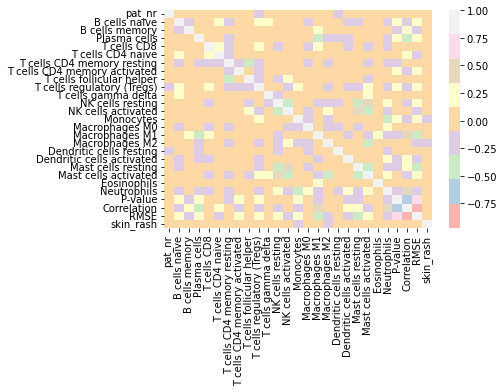

In [12]:
import seaborn as sns

# Heatmap
corr = cdf.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "Pastel1")

### LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

model = LogisticRegression(class_weight='balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 6) # Holdout

In [14]:
cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.008687,0.010294,0.558824,0.444444,0.285714,0.347826
1,0.007238,0.003982,0.636364,0.500000,0.333333,0.400000
2,0.005415,0.004298,0.545455,0.625000,0.294118,0.400000
3,0.006831,0.005709,0.545455,0.250000,0.181818,0.210526
4,0.007797,0.006407,0.666667,0.625000,0.384615,0.476190
5,0.006087,0.006251,0.363636,0.375000,0.157895,0.222222
6,0.006464,0.006506,0.575758,0.750000,0.333333,0.461538
7,0.005858,0.003954,0.484848,0.375000,0.200000,0.260870
8,0.010611,0.008471,0.727273,0.875000,0.466667,0.608696
9,0.008902,0.004298,0.545455,0.555556,0.312500,0.400000


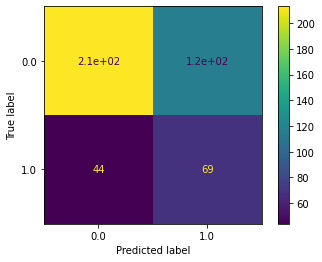

In [15]:
from sklearn.metrics import plot_confusion_matrix
model=model.fit(X,y)
plot_confusion_matrix(model,X,y)

In [16]:
y.value_counts()

0.0    329
1.0    113
Name: skin_rash, dtype: int64

### KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
cv_results = cross_validate(model2, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.003839,0.009599,0.735294,0.000000,0.000000,0.000000
1,0.001656,0.008637,0.757576,0.000000,0.000000,0.000000
2,0.001779,0.005541,0.727273,0.250000,0.400000,0.307692
3,0.001640,0.007210,0.727273,0.125000,0.333333,0.181818
4,0.001878,0.005651,0.666667,0.250000,0.285714,0.266667
5,0.002155,0.005577,0.727273,0.125000,0.333333,0.181818
6,0.002006,0.005649,0.727273,0.250000,0.400000,0.307692
7,0.001761,0.005812,0.757576,0.125000,0.500000,0.200000
8,0.001657,0.009200,0.696970,0.250000,0.333333,0.285714
9,0.001742,0.005674,0.696970,0.111111,0.333333,0.166667


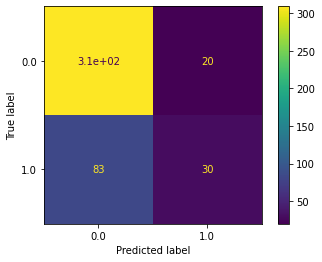

In [18]:
plot_confusion_matrix(model2,X,y)

### SGDClassifier

In [19]:
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

model3 = SGDClassifier(class_weight='balanced')


model3.fit(X_test,y_test)
cv_results = cross_validate(model3, X_test, y_test, cv=10, scoring=['precision'])

#simplified_model_score = cv_results['test_score'].mean()
cv_results

/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.00244117, 0.00261617, 0.00269771, 0.00196743, 0.00284147,
        0.00163245, 0.00164318, 0.00395036, 0.00183344, 0.0018189 ]),
 'score_time': array([0.00460267, 0.00152397, 0.00299001, 0.00179076, 0.00151372,
        0.00161171, 0.00267792, 0.00180531, 0.00152421, 0.00157547]),
 'test_precision': array([1.        , 0.27272727, 0.27272727, 0.        , 0.27272727,
        0.25      , 0.3       , 0.        , 0.33333333, 0.16666667])}

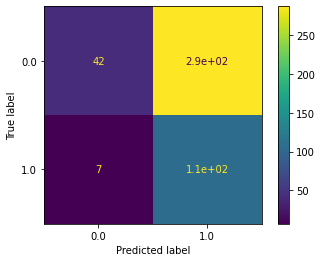

In [20]:
plot_confusion_matrix(model3,X,y)

### Best Model so far

In [21]:
best="KNeighbors"

In [22]:
model4 = KNeighborsClassifier(n_neighbors=20)
model4.fit(X_train,y_train)
cv_results = cross_validate(model4, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrumalina/.py

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.001801,0.007468,0.735294,0.000,0.0,0.000000
1,0.001819,0.007219,0.727273,0.000,0.0,0.000000
2,0.002322,0.010608,0.727273,0.000,0.0,0.000000
3,0.002573,0.006124,0.757576,0.000,0.0,0.000000
4,0.001564,0.008671,0.787879,0.125,1.0,0.222222
5,0.001661,0.006160,0.757576,0.000,0.0,0.000000
6,0.001520,0.010296,0.757576,0.000,0.0,0.000000
7,0.002371,0.006111,0.757576,0.000,0.0,0.000000
8,0.001763,0.008038,0.757576,0.000,0.0,0.000000
9,0.001791,0.007380,0.727273,0.000,0.0,0.000000


In [23]:
from sklearn.model_selection import GridSearchCV
model5 = KNeighborsClassifier()
k_grid={"n_neighbors":[20,21,22,23,24],'p': [1, 2, 3,4,5]}
 
search = GridSearchCV(model5, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train,y_train);
search.best_params_

{'n_neighbors': 22, 'p': 1}

In [24]:
model6=KNeighborsClassifier(n_neighbors=22,p=1)
cv_results=cross_validate(model6,X_train,y_train,cv=5)
cv_results

{'fit_time': array([0.00357985, 0.00408983, 0.0017786 , 0.00169611, 0.0015974 ]),
 'score_time': array([0.00799441, 0.01818395, 0.0072124 , 0.00489521, 0.00589156]),
 'test_score': array([0.74626866, 0.77272727, 0.75757576, 0.75757576, 0.74242424])}

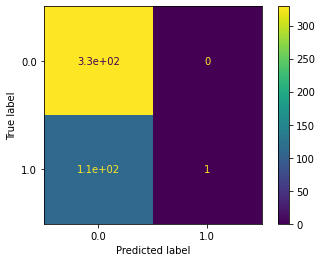

In [25]:
model6.fit(X_train,y_train)
plot_confusion_matrix(model6,X,y)

## What I am gonna work on: Logistic Regression Model